In [ ]:
# Este notebook não está atualizado

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

### Importando os dados

In [2]:
data = pd.read_csv('BASE_TESTE.txt', sep=';')

In [3]:
data.head()

,ID,SAFRA,CEP,IDADE,GENERO,RENDA,SCORE_F1,SCORE_F2,IND_BOM
0,1,201907,92010190,37,M,40000.0,528.0,719.0,1
1,2,201909,65090650,36,M,19500.0,454.0,717.0,1
2,3,201908,13482783,43,F,1200.0,756.0,827.0,1
3,4,201905,60541704,35,M,1280.0,2.0,607.0,0
4,5,201906,69086129,27,M,7058.0,517.0,738.0,0


In [4]:
data.shape

(6187, 9)

In [5]:
data['IND_BOM'].value_counts()

1    4439
0    1748
Name: IND_BOM, dtype: int64

### Limpeza dos Dados 

In [6]:
data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6187 entries, 0 to 6186
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        6187 non-null   int64  
 1   SAFRA     6187 non-null   int64  
 2   CEP       6187 non-null   int64  
 3   IDADE     6187 non-null   int64  
 4   GENERO    6162 non-null   object 
 5   RENDA     6187 non-null   float64
 6   SCORE_F1  6184 non-null   float64
 7   SCORE_F2  6185 non-null   float64
 8   IND_BOM   6187 non-null   int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 435.1+ KB


In [7]:
data.describe()

,ID,SAFRA,CEP,IDADE,RENDA,SCORE_F1,SCORE_F2,IND_BOM
count,6187.000000,6187.000000,6.187000e+03,6187.000000,6187.000000,6184.000000,6185.000000,6187.000000
mean,3094.000000,201907.226281,3.946375e+07,36.730726,4534.006455,592.244502,681.563298,0.717472
std,1786.177389,1.322369,3.192985e+07,16.259660,4126.257507,191.671301,82.583387,0.450265
min,1.000000,201905.000000,1.106070e+06,12.000000,998.000000,2.000000,411.000000,0.000000
25%,1547.500000,201906.000000,9.945891e+06,28.000000,2200.000000,473.000000,626.000000,0.000000
50%,3094.000000,201907.000000,2.904520e+07,35.000000,3300.000000,608.000000,681.000000,1.000000
75%,4640.500000,201908.000000,7.197891e+07,43.000000,5000.000000,739.000000,740.000000,1.000000
max,6187.000000,201909.000000,9.971311e+07,999.000000,60000.000000,984.000000,939.000000,1.000000


Pontos estranhos: 
- Idade 999
- Idade 12 

In [8]:
delete = data[(data['IDADE']==999) | (data['IDADE']<18)].index

In [9]:
data.drop(delete, inplace=True)  # removendo clientes menores que 18 anos e o ponto estranho 999

In [10]:
data.isnull().sum()  # valores NAN por variável

ID           0
SAFRA        0
CEP          0
IDADE        0
GENERO      25
RENDA        0
SCORE_F1     3
SCORE_F2     2
IND_BOM      0
dtype: int64

In [11]:
data.dropna(inplace=True) # vou optar por remover os NAN, mas nem sempre isso é bom 

In [12]:
data.shape # note que a base diminuiu 

(6131, 9)

In [13]:
data.drop('ID',axis=1,inplace=True) # id não é interresante para a modelagem 

### Análise Exploratória dos Dados 

Vamos tentar identificar visualmente quais variáveis mais explicam a classificação de um cliente em Inadimplente ou Adimplente.

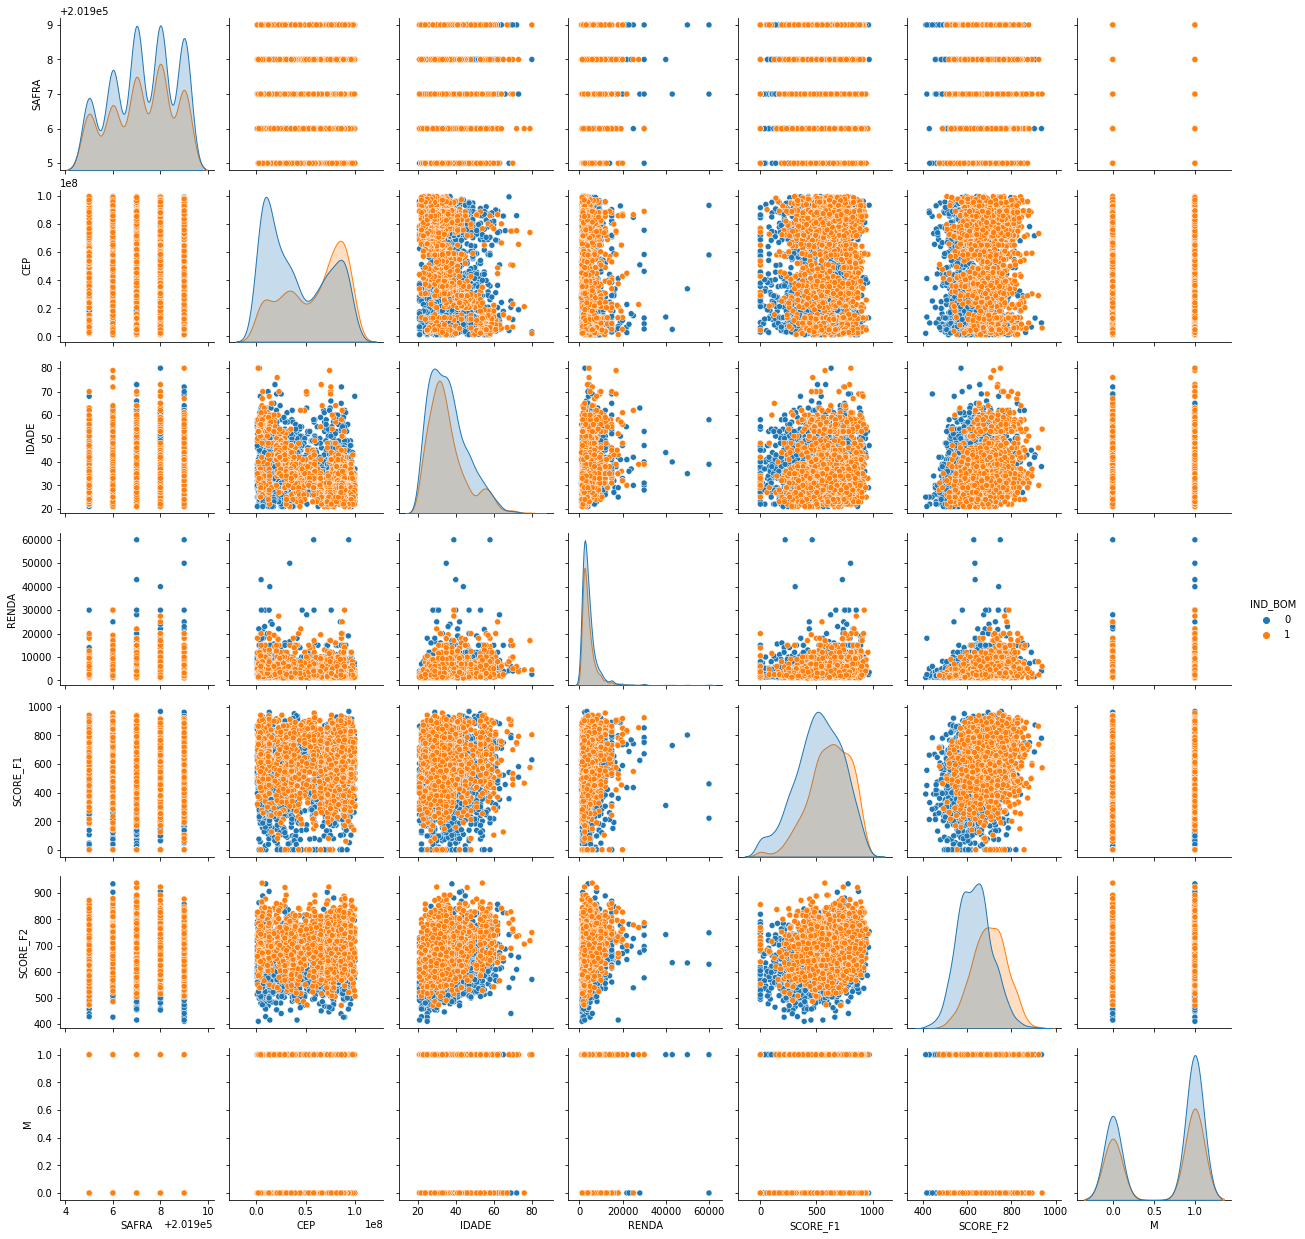

In [66]:
sns.pairplot(data, hue='IND_BOM')

Text(0.5, 1.0, 'Boxplot por Classificação: 0-Inadimplente e 1-Adimplente.')

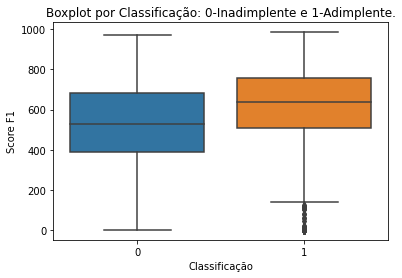

In [14]:
sns.boxplot(x='IND_BOM',y="SCORE_F1",data=data) # o score F1 parece interferir na classificação
plt.xlabel('Classificação')
plt.ylabel('Score F1')
plt.title('Boxplot por Classificação: 0-Inadimplente e 1-Adimplente.')

Text(0.5, 1.0, 'Boxplot por Classificação: 0-Inadimplente e 1-Adimplente.')

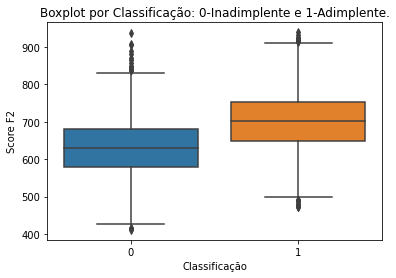

In [15]:
sns.boxplot(x='IND_BOM',y="SCORE_F2",data=data) # o score F2 parece interferir na classificação
plt.xlabel('Classificação')
plt.ylabel('Score F2')
plt.title('Boxplot por Classificação: 0-Inadimplente e 1-Adimplente.')

Text(0.5, 1.0, 'Classificação por Gênero: 0-Inadimplente e 1-Adimplente.')

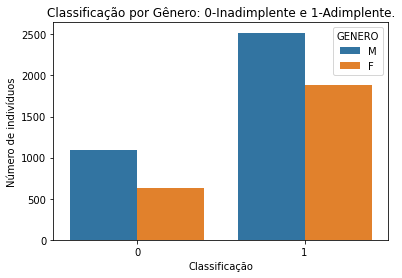

In [16]:
sns.countplot(x='IND_BOM',hue='GENERO', data=data) # na base pode ter mais homens, vamos olhar para a frequência
plt.xlabel('Classificação')
plt.ylabel('Número de indivíduos')
plt.title('Classificação por Gênero: 0-Inadimplente e 1-Adimplente.')

In [17]:
def calcula_frequencia(col):
    mulher_adim = aux[1]/(aux[1]+aux[3])
    mulher_inadim = 1-mulher_adim
    homem_adim = aux[0]/(aux[0]+aux[2])
    homem_inadim = 1-homem_adim
    return mulher_adim,mulher_inadim,homem_adim, homem_inadim

aux=data[['GENERO', 'IND_BOM']].value_counts()
calcula_frequencia(aux)

df = pd.DataFrame(data={'Adimplente': [calcula_frequencia(aux)[0],calcula_frequencia(aux)[2]],
                        'Inadimplente': [calcula_frequencia(aux)[1],calcula_frequencia(aux)[3]]})

df.index = ['Feminino', 'Masculino']
df # o sexo levemente parece interferir na classificação (incerto) 

,Adimplente,Inadimplente
Feminino,0.747117,0.252883
Masculino,0.696903,0.303097


In [18]:
aux=data[['SAFRA', 'IND_BOM']].value_counts()

df = pd.DataFrame(data={'Adimplente': 
                        [aux.iloc[0]/(aux.iloc[0]+aux.iloc[5]),
                        aux.iloc[1]/(aux.iloc[1]+aux.iloc[6]),
                        aux.iloc[2]/(aux.iloc[2]+aux.iloc[7]),
                        aux.iloc[3]/(aux.iloc[3]+aux.iloc[8]),
                        aux.iloc[4]/(aux.iloc[4]+aux.iloc[9])],
                        'Inadimplente': 
                        [aux.iloc[5]/(aux.iloc[0]+aux.iloc[5]),
                        aux.iloc[6]/(aux.iloc[1]+aux.iloc[6]),
                        aux.iloc[7]/(aux.iloc[2]+aux.iloc[7]),
                        aux.iloc[8]/(aux.iloc[3]+aux.iloc[8]),
                        aux.iloc[9]/(aux.iloc[4]+aux.iloc[9])]})

df.index = ['201908','201907','201909','201906','201905']
df # a safra levemente parece interferir na classificação (ordenar as safras aqui)

,Adimplente,Inadimplente
201908,0.718667,0.281333
201907,0.713800,0.286200
201909,0.701007,0.298993
201906,0.718419,0.281581
201905,0.746394,0.253606


Text(0.5, 1.0, 'Boxplot da Idade por Classificação: 0-Inadimplente e 1-Adimplente.')

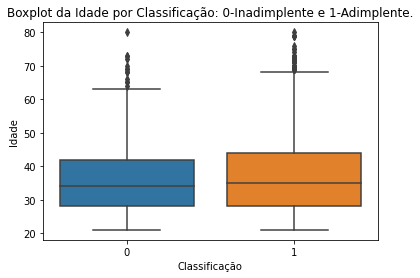

In [19]:
sns.boxplot(x='IND_BOM',y="IDADE",data=data) # a idade não parece interferir na classificação 
plt.xlabel('Classificação')
plt.ylabel('Idade')
plt.title('Boxplot da Idade por Classificação: 0-Inadimplente e 1-Adimplente.')

Text(0.5, 1.0, 'Boxplot da Renda por Classificação: 0-Inadimplente e 1-Adimplente.')

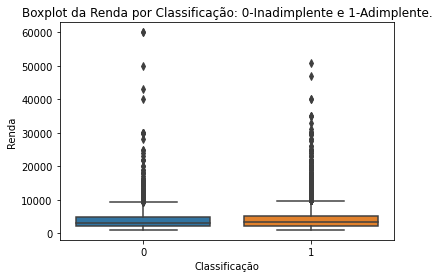

In [20]:
sns.boxplot(x='IND_BOM',y='RENDA',data=data) # olhar log da renda?
plt.xlabel('Classificação')
plt.ylabel('Renda')
plt.title('Boxplot da Renda por Classificação: 0-Inadimplente e 1-Adimplente.')
# olhando assim a renda não parece interferir na classificação, mas é preciso analisar melhor por conta da escala

In [14]:
# Isso faz parte da limpeza 
GENERO = pd.get_dummies(data['GENERO'],drop_first=True)
data.drop('GENERO', axis=1, inplace=True)
data = pd.concat([data, GENERO], axis=1)

### Separando os dados em treinamento e teste

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = data.loc[:,data.columns != 'IND_BOM']
y = data['IND_BOM']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=20)

### Modelo de Regressão Logística 

O modelo de regressão logística é sensível à dados desbalanceados, portanto é necessário balanceá-los.
Obs.: Não é o jeito mais correto de balancear, só fiz pra ver se ia dar certo modelar

In [ ]:
# Balanceando os dados (isso faria parte da limpeza)
data0=data[data['IND_BOM']==0]
data1=data[data['IND_BOM']==1]
data1=data1.loc[1:1800,]

data=pd.concat([data0,data1], axis=0)

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
model1 = LogisticRegression()
model1.fit(X_train, y_train)

LogisticRegression()

In [35]:
predict1 = model1.predict(X_test)

In [36]:
from sklearn.metrics import classification_report,confusion_matrix

In [37]:
print(classification_report(y_test,predict1))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       515
           1       0.72      1.00      0.84      1325

    accuracy                           0.72      1840
   macro avg       0.36      0.50      0.42      1840
weighted avg       0.52      0.72      0.60      1840



/home/ana/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ana/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ana/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
print(confusion_matrix(y_test,predict1))

[[392 140]
 [177 187]]


### Modelo KNN

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
knn = KNeighborsClassifier(n_neighbors=3)

In [28]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [29]:
pred = knn.predict(X_test)

In [30]:
print(confusion_matrix(y_test,pred))

[[ 102  413]
 [ 277 1048]]


In [31]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.27      0.20      0.23       515
           1       0.72      0.79      0.75      1325

    accuracy                           0.62      1840
   macro avg       0.49      0.49      0.49      1840
weighted avg       0.59      0.62      0.61      1840



### Escolher valore de k

In [81]:
error_rate = []

# Levará algum tempo
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

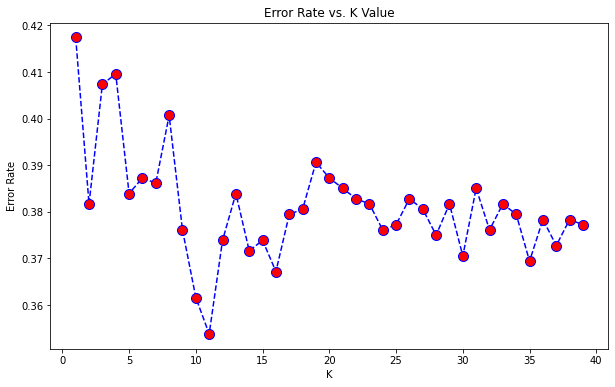

In [82]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

### Modelo de árvore de decisão

No modelo de árvores não é necessário que os dados sejam balanceados.

In [19]:
from sklearn.tree import DecisionTreeClassifier

In [20]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [22]:
predictions = dtree.predict(X_test)

In [25]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.44      0.45      0.44       515
           1       0.78      0.78      0.78      1325

    accuracy                           0.68      1840
   macro avg       0.61      0.61      0.61      1840
weighted avg       0.69      0.68      0.68      1840



In [38]:
print(confusion_matrix(y_test,predictions))

[[ 230  285]
 [ 298 1027]]


### Visualizando a árvore 

In [45]:
from sklearn.tree import plot_tree

In [47]:
plt.figure(figsize=(20,10))
plot_tree(dtree, feature_names=X_test.columns)

[Text(387.1337343403953, 533.5333333333333, 'SCORE_F2 <= 618.5\ngini = 0.406\nsamples = 4291\nvalue = [1217, 3074]'),
 Text(171.93702165484822, 513.4, 'SCORE_F2 <= 587.5\ngini = 0.493\nsamples = 957\nvalue = [537, 420]'),
 Text(102.2241517848175, 493.2666666666667, 'SCORE_F1 <= 665.5\ngini = 0.468\nsamples = 579\nvalue = [363, 216]'),
 Text(39.506458287298365, 473.1333333333333, 'SCORE_F2 <= 505.5\ngini = 0.441\nsamples = 445\nvalue = [299, 146]'),
 Text(12.195496273678712, 453.0, 'IDADE <= 56.0\ngini = 0.219\nsamples = 48\nvalue = [42, 6]'),
 Text(10.7607320061871, 432.8666666666667, 'M <= 0.5\ngini = 0.19\nsamples = 47\nvalue = [42, 5]'),
 Text(5.739057069966453, 412.73333333333335, 'CEP <= 7483460.0\ngini = 0.332\nsamples = 19\nvalue = [15, 4]'),
 Text(2.8695285349832265, 392.6, 'CEP <= 5604715.0\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(1.4347642674916132, 372.4666666666667, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(4.30429280247484, 372.4666666666667, 'gini = 0.0

Error in callback <function flush_figures at 0x7fd73f5c6f80> (for post_execute):


KeyboardInterrupt: 

### Modelo de florestas aleatórias 

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [50]:
rfc_pred = rfc.predict(X_test)

In [51]:
print(confusion_matrix(y_test,rfc_pred))

[[ 199  316]
 [ 132 1193]]


In [52]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.60      0.39      0.47       515
           1       0.79      0.90      0.84      1325

    accuracy                           0.76      1840
   macro avg       0.70      0.64      0.66      1840
weighted avg       0.74      0.76      0.74      1840



### Modelo SVM

In [53]:
from sklearn.svm import SVC

In [55]:
model = SVC()
model.fit(X_train,y_train)

SVC()

In [56]:
predictions = model.predict(X_test)

In [57]:
print(confusion_matrix(y_test,predictions))

[[   0  515]
 [   0 1325]]


In [58]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       515
           1       0.72      1.00      0.84      1325

    accuracy                           0.72      1840
   macro avg       0.36      0.50      0.42      1840
weighted avg       0.52      0.72      0.60      1840



/home/ana/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ana/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/ana/.local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Modelo SVM com Gridsearch

In [59]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)  # sempre coloque verbose != 0 

In [62]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   3.8s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   4.0s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   3.9s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   4.1s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   4.0s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   3.8s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   3.9s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   3.9s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   4.0s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   4.1s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   4.0s
[CV 2/5] END ..................C=0.1, gamma=0.0

[CV 2/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   4.9s
[CV 3/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   5.1s
[CV 4/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   5.1s
[CV 5/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   5.2s
[CV 1/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   5.2s
[CV 2/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   5.2s
[CV 3/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   5.3s
[CV 4/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   5.1s
[CV 5/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   5.1s
[CV 1/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   5.1s
[CV 2/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   5.0s
[CV 3/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   4.8s
[CV 4/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [63]:
grid.best_params_  # melhores parâmetros 

{'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}

In [64]:
grid_predictions = grid.predict(X_test)

In [65]:
print(confusion_matrix(y_test,grid_predictions))

[[   8  507]
 [   1 1324]]


In [66]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.89      0.02      0.03       515
           1       0.72      1.00      0.84      1325

    accuracy                           0.72      1840
   macro avg       0.81      0.51      0.43      1840
weighted avg       0.77      0.72      0.61      1840



### K-means (não supervisionado)

In [67]:
from sklearn.cluster import KMeans

In [76]:
kmeans = KMeans(n_clusters=2)

In [77]:
kmeans.fit(X)

KMeans(n_clusters=2)

In [78]:
kmeans.cluster_centers_

array([[2.01907207e+05, 7.74385589e+07, 3.62074074e+01, 4.38045757e+03,
        5.95514597e+02, 6.79464052e+02, 6.13943355e-01],
       [2.01907236e+05, 1.67473731e+07, 3.69653285e+01, 4.63453123e+03,
        5.89861053e+02, 6.82714286e+02, 5.75338895e-01]])

In [79]:
kmeans.labels_

array([0, 0, 1, ..., 1, 1, 1], dtype=int32)

In [80]:
y

0       1
1       1
2       1
3       0
4       0
       ..
6182    1
6183    1
6184    0
6185    1
6186    1
Name: IND_BOM, Length: 6131, dtype: int64

In [86]:
sum(kmeans.labels_==y)

3462

In [87]:
# acurácia 
3462/6131

0.5646713423585059